In [1]:
import snap
Graph_2a = snap.LoadEdgeList(snap.PNGraph, "D:\M.TECH SEM 2\MLN\Assignments\A1\mln_a1\mln_a1\so.txt", 0, 1)

In [2]:
strong_com = snap.TCnComV()
snap.GetSccs(Graph_2a, strong_com)
print(f"The no. of strongly connected components in the graph is {len(strong_com)}")

The no. of strongly connected components in the graph is 142474


In [3]:
weak_com = snap.TCnComV()
snap.GetWccs(Graph_2a, weak_com)
print(f"The no. of weakly connected components in the graph is {len(weak_com)}")

The no. of weakly connected components in the graph is 10143


In [4]:
max_weak_conn = snap.GetMxWcc(Graph_2a)
edge_list = max_weak_conn.Edges()
cnt_node_max_weak = 0
for ed in edge_list:
    cnt_node_max_weak += 1

print(f"The no. of edges in the largest weakly connected component is {cnt_node_max_weak}")

The no. of edges in the largest weakly connected component is 322486


In [5]:
cnt_total_nodes = snap.CntNonZNodes(Graph_2a)
#Getting the fraction of nodes in largest weakly component below
max_weak_rel_node = snap.GetMxWccSz(Graph_2a)
#Getting no. of nodes in the maximum weakly connected component
cnt_max_weak_nodes = max_weak_rel_node * cnt_total_nodes
print(f"The no. of nodes in the largest weakly connected component is {cnt_max_weak_nodes}")

The no. of nodes in the largest weakly connected component is 131188.0


Sent nodes = 146874
The highest page rank value is = 0.013980540412209575
The node with highest page rank is 992484
The lowest page rank value is = 2.4082266411394174e-06
The node with lowest page rank is 78
24361


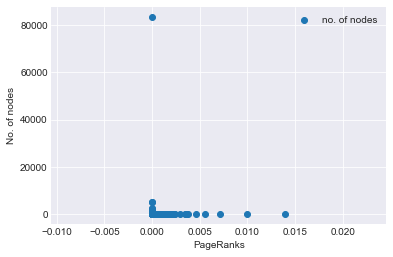

In [8]:
#Finding the page rank distribution of the graph
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

hash_rank = snap.TIntFltH()
sent_nodes = 0
iter = Graph_2a.Nodes()
for a in iter:
    sent_nodes += 1
print(f"Sent nodes = {sent_nodes}")
snap.GetPageRank(Graph_2a, hash_rank)
list_page_ranks = []
list_nodes_ret = []
for val in hash_rank:
    #print(val, hash_rank[val])
    list_page_ranks.append(hash_rank[val])
    list_nodes_ret.append(val)
#print(list_page_ranks)
idx_max_rank = list_page_ranks.index(max(list_page_ranks))
idx_min_rank = list_page_ranks.index(min(list_page_ranks))
print(f"The highest page rank value is = {list_page_ranks[idx_max_rank]}")
print(f"The node with highest page rank is {list_nodes_ret[idx_max_rank]}")

print(f"The lowest page rank value is = {list_page_ranks[idx_min_rank]}")
print(f"The node with lowest page rank is {list_nodes_ret[idx_min_rank]}")
count_nodes = Graph_2a.GetNodes()
dict_cntr_page_rank = Counter(list_page_ranks)
x_cord = []
y_cord = []
for mn in dict_cntr_page_rank:
    x_cord.append(mn)
    a = dict_cntr_page_rank[mn] / count_nodes
    y_cord.append(dict_cntr_page_rank[mn])

plt.scatter(x_cord, y_cord, label= "no. of nodes")
print(len(x_cord))
plt.xlabel('PageRanks')
plt.ylabel('No. of nodes')
plt.legend() 
plt.show()

In [7]:
hash_hub = snap.TIntFltH()
hash_auth = snap.TIntFltH()
snap.GetHits(Graph_2a, hash_hub, hash_auth)
list_hub_pairs = []
list_auth_pairs = []
dict_hub_lib = {}
dict_auth_lib = {}
for val in hash_hub:
    pair = [val, hash_hub[val]]
    list_hub_pairs.append(pair)
    dict_hub_lib[val] = float(hash_hub[val])
for val in hash_auth:
    pair = [val, hash_auth[val]]
    list_auth_pairs.append(pair)
    dict_auth_lib[val] = float(hash_auth[val])

list_hub_pairs.sort(key=lambda x: x[1], reverse = True)
list_auth_pairs.sort(key=lambda x: x[1],reverse = True)

top_5_hub = []
top_5_auth = []
top_5_hub_scores = []
top_5_auth_scores = []
for i in range(5):
    top_5_hub.append(list_hub_pairs[i][0])
    top_5_auth.append(list_auth_pairs[i][0])
    top_5_hub_scores.append(list_hub_pairs[i][1])
    top_5_auth_scores.append(list_auth_pairs[i][1])

print("Top 5 hubs are: ")

for i in range(1,6):
    print(f"Hub {i}  is  {top_5_hub[i-1]}")

print("\nTop 5 authorities are: ")
for i in range(1,6):
    print(f"Authority {i}  is  {top_5_auth[i-1]}")

print(f"\n Top 5 hub scores are {top_5_hub_scores}")
print(f"\n Top 5 authority scores are {top_5_auth_scores}")

Top 5 hubs are: 
Hub 1  is  892029
Hub 2  is  1194415
Hub 3  is  359862
Hub 4  is  648138
Hub 5  is  470184

Top 5 authorities are: 
Authority 1  is  22656
Authority 2  is  157882
Authority 3  is  571407
Authority 4  is  57695
Authority 5  is  139985

 Top 5 hub scores are [0.07336380373389548, 0.05955074418794487, 0.05687564588068672, 0.05559306276715878, 0.05317942934583511]

 Top 5 authority scores are [0.6047239730413133, 0.2986993488728824, 0.2839071934144654, 0.26930508258231756, 0.24940086742800438]
